In [1]:
import seaborn as sns
sns.set()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read raw file

In [2]:
path = 'data/Reading_raw.xlsx'
def preprocessing(path):
    df = pd.read_excel(path, converters={'date': pd.to_datetime}).drop(['Unnamed: 8'], axis=1)
    
    # Drop row where waiting for new book to arrive
    df = df[df['book'].ne('Deep Learning')]
    return df

Create dataframes for analysis

In [3]:
df = preprocessing(path)

booking_logic = df['book'].ne('Fail')
book_df = df[booking_logic]
fail_df = df[~booking_logic]

In [4]:
df.head()

,date,book,author,time_start,time_end,start_pg,end_pg,comment
0,2018-12-31,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,15:45:00,16:20:00,233,240,Started
1,2019-01-01,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,22:56:00,23:11:00,240,248,NaN
2,2019-01-02,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,23:00:00,23:30:00,248,252,NaN
3,2019-01-03,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,1,14,NaN
4,2019-01-04,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,14,20,NaN


How many books read and what were they

In [5]:
total = df['book'].nunique()
books = df['book'].unique().tolist()
print(total)
print(books)

8
['How Not to Be Wrong The Power of Mathematical Thinking', 'How I Killed Pluto and Why It Had It Coming', 'Fail', 'The Physics of God', 'A Gentleman in Moscow', 'Algorithms to Live By', 'Batman and Ethics', 'Where Do I Begin']


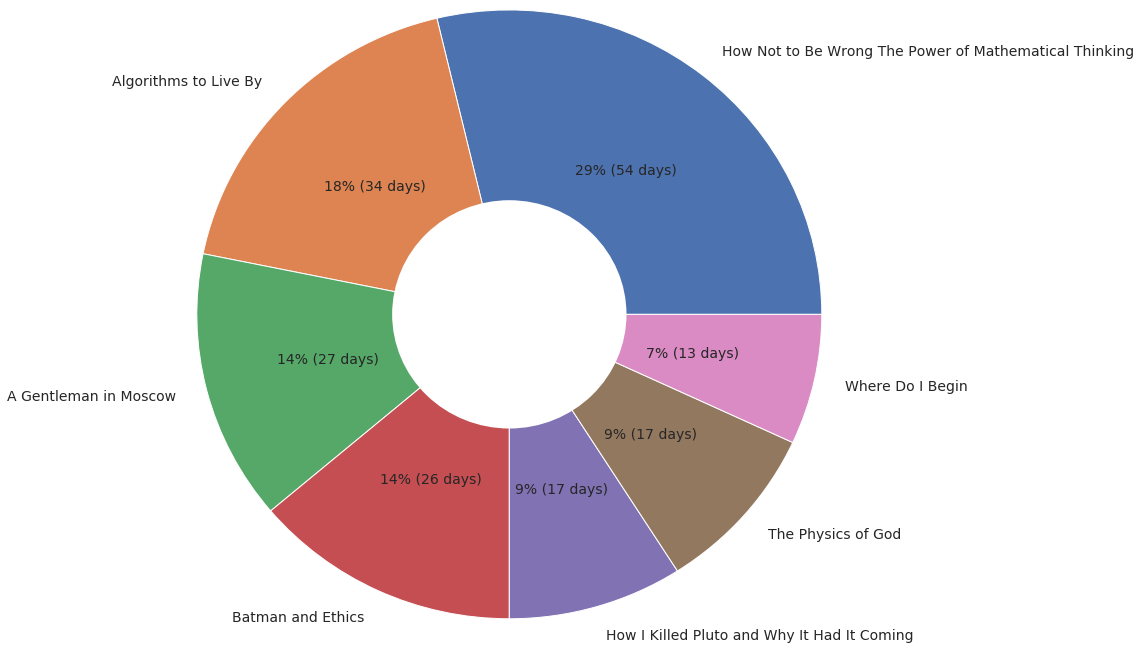

In [6]:
ax = book_df['book'].value_counts().plot.pie(autopct=lambda x: '{:.0f}% ({:.0f} days)'.format(x, x * 188/100), radius=2, fontsize=14, figsize=(7, 7))


centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

How many pages was each book

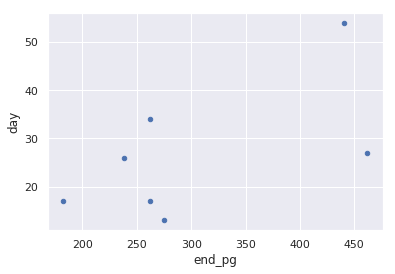

In [7]:
pie_df = book_df.drop_duplicates(['book'], keep='last')[['book', 'end_pg']].set_index('book').merge(book_df['book'].value_counts().to_frame(), left_index=True, right_index=True).rename(columns={'book': 'day'})
pie_df.plot(kind='scatter', x='end_pg', y='day')

Failure vs success

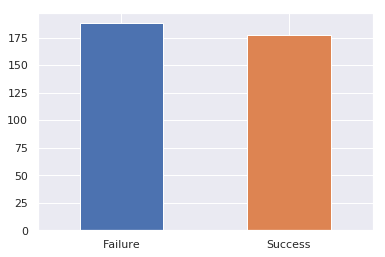

In [8]:
df.assign(success=lambda x: x['book'].eq('Fail'))['success'].astype(int).map({0: 'Failure', 1: 'Success'}).value_counts().plot(kind='bar', rot=0)

In [9]:
count = fail_df['comment'].str.lower().nunique()
print('{} reasons for not reading'.format(count))

70 reasons for not reading


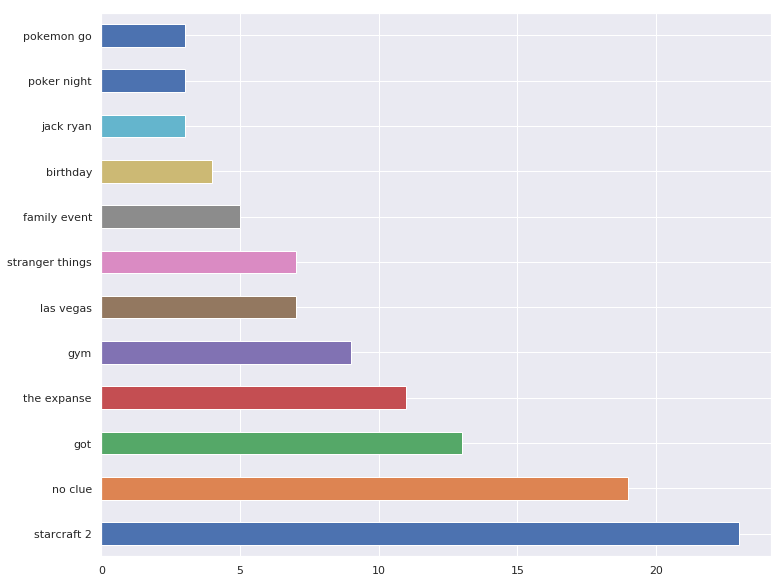

In [10]:
fail_df['comment'].str.lower().value_counts().nlargest(12).plot.barh(figsize=(12, 10))

In [11]:
# Most pages read in one day
df['pages_read'] = df['end_pg'] - df['start_pg']
df.loc[df['pages_read'].idxmax()]

# Amazing how the day i read the most I had no comments

date          2019-11-08 00:00:00
book             Where Do I Begin
author                Elvis Duran
time_start               23:01:00
time_end                 23:48:00
start_pg                      100
end_pg                        145
comment                       NaN
pages_read                     45
Name: 312, dtype: object

In [12]:
# longest reading day
te = pd.to_datetime(book_df['time_end'].astype(str), format='%H:%M:%S')
ts = pd.to_datetime(book_df['time_start'].astype(str), format='%H:%M:%S')
book_df['time_reading'] = ((te - ts).dt.seconds / 60).astype(int)

/home/ksooklall/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
bmean, bstd = book_df['time_reading'].mean(), book_df['time_reading'].std()

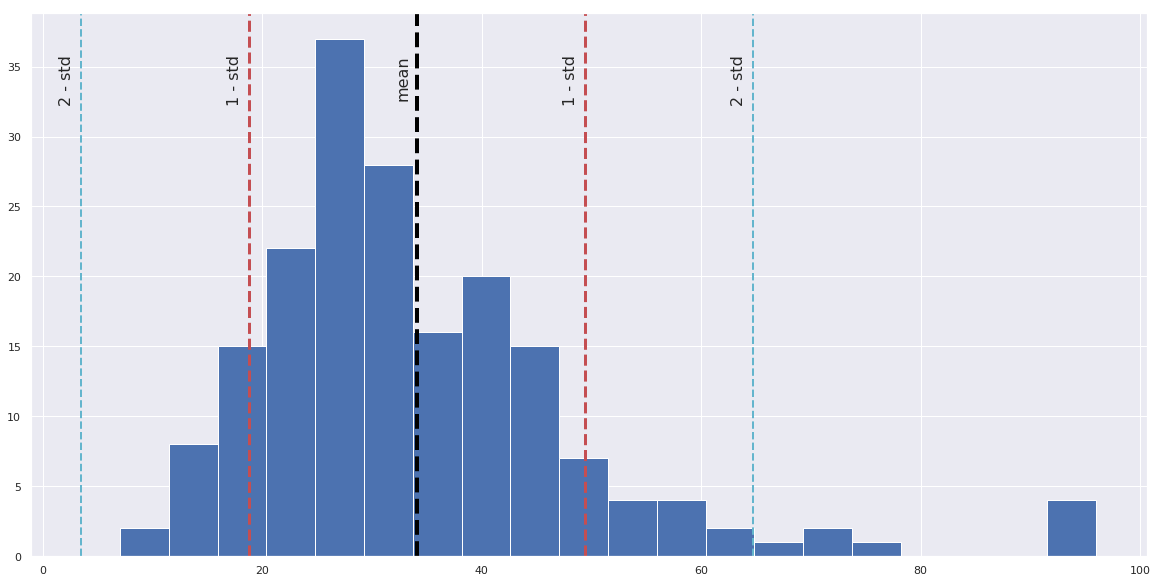

In [14]:
pad = 2
fontsize=16

plt.axvline(bmean, color='black', linestyle='dashed', linewidth=4)
plt.axvline(bmean + bstd, color='r', linestyle='dashed', linewidth=3)
plt.axvline(bmean - bstd, color='r', linestyle='dashed', linewidth=3)
plt.axvline(bmean + 2 * bstd, color='c', linestyle='dashed', linewidth=2)
plt.axvline(bmean - 2 * bstd, color='c', linestyle='dashed', linewidth=2)

plt.text(bmean-pad, 35,'mean',fontsize=fontsize,rotation=90)
plt.text(bmean+bstd-pad,35,'1 - std',fontsize=fontsize,rotation=90)
plt.text(bmean-bstd-pad, 35, '1 - std',fontsize=fontsize,rotation=90)
plt.text(bmean+2*bstd-pad, 35, '2 - std',fontsize=fontsize,rotation=90)
plt.text(bmean-2*bstd-pad, 35, '2 - std',fontsize=fontsize,rotation=90)

book_df['time_reading'].hist(figsize=(20, 10), bins=20)

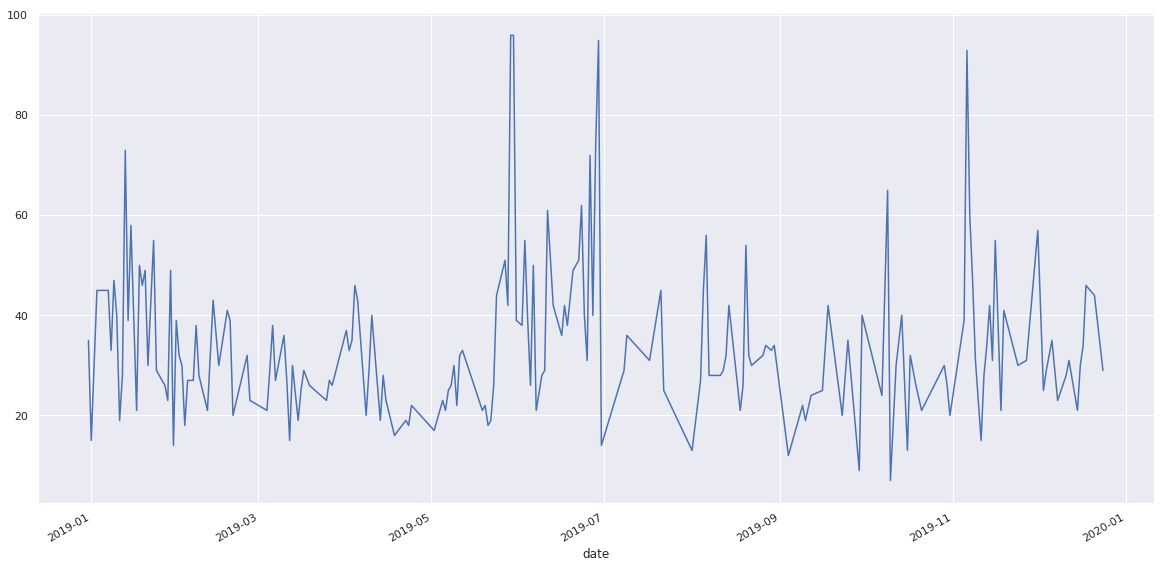

In [15]:
book_df.set_index('date')['time_reading'].plot(figsize=(20, 10))

In [16]:
# a little more than an hour and a half
book_df.loc[book_df['time_reading'].idxmax()]

date              2019-05-29 00:00:00
book            A Gentleman in Moscow
author                    Amor Towles
time_start                   22:50:00
time_end                     00:26:00
start_pg                           18
end_pg                             48
comment                    Baudelaire
time_reading                       96
Name: 149, dtype: object

In [22]:
df.head()

,date,book,author,time_start,time_end,start_pg,end_pg,comment,pages_read
0,2018-12-31,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,15:45:00,16:20:00,233,240,Started,7
1,2019-01-01,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,22:56:00,23:11:00,240,248,NaN,8
2,2019-01-02,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,23:00:00,23:30:00,248,252,NaN,4
3,2019-01-03,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,1,14,NaN,13
4,2019-01-04,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,14,20,NaN,6


In [28]:
book_df.loc[10:25]

,date,book,author,time_start,time_end,start_pg,end_pg,comment,time_reading
10,2019-01-10,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:40:00,23:20:00,72,86,NaN,40
11,2019-01-11,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:34:00,23:53:00,86,94,NaN,19
12,2019-01-12,How I Killed Pluto and Why It Had It Coming,Mike Brown,14:57:00,15:25:00,94,102,NaN,28
13,2019-01-13,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:12:00,00:25:00,102,130,NaN,73
14,2019-01-14,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:25:00,23:04:00,130,140,NaN,39
15,2019-01-15,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:44:00,23:42:00,140,166,NaN,58
17,2019-01-17,How I Killed Pluto and Why It Had It Coming,Mike Brown,21:30:00,21:51:00,166,178,NaN,21
18,2019-01-18,How I Killed Pluto and Why It Had It Coming,Mike Brown,20:20:00,21:10:00,178,200,NaN,50
19,2019-01-19,How I Killed Pluto and Why It Had It Coming,Mike Brown,18:50:00,19:36:00,200,224,NaN,46
20,2019-01-20,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:56:00,23:45:00,224,250,NaN,49


In [29]:
book_df['time_reading'].head()

0    35
1    15
2    30
3    45
4    45
Name: time_reading, dtype: int64

In [31]:
df = df.merge(book_df['time_reading'].to_frame(), left_index=True, right_index=True, how='outer')

In [34]:
tmp = df['time_start'].where(df['time_start'].eq(0), 1).astype(int)
tmp = tmp.groupby(tmp.eq(0).cumsum()).cumsum()

end = tmp.idxmax()
length = tmp.max()

In [35]:
longest_streak = df.loc[end - length + 1:end]
longest_streak

,date,book,author,time_start,time_end,start_pg,end_pg,comment,pages_read,time_reading
6,2019-01-06,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,20,28,NaN,8,45.0
7,2019-01-07,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,28,42,NaN,14,45.0
8,2019-01-08,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:40:00,23:13:00,42,47,NaN,5,33.0
9,2019-01-09,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:10:00,22:57:00,47,72,NaN,25,47.0
10,2019-01-10,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:40:00,23:20:00,72,86,NaN,14,40.0
11,2019-01-11,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:34:00,23:53:00,86,94,NaN,8,19.0
12,2019-01-12,How I Killed Pluto and Why It Had It Coming,Mike Brown,14:57:00,15:25:00,94,102,NaN,8,28.0
13,2019-01-13,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:12:00,00:25:00,102,130,NaN,28,73.0
14,2019-01-14,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:25:00,23:04:00,130,140,NaN,10,39.0
15,2019-01-15,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:44:00,23:42:00,140,166,NaN,26,58.0


In [36]:
print(longest_streak['time_reading'].sum() % 60)
longest_streak['pages_read'].sum()

7.0


146

In [37]:
lstart = longest_streak.iloc[0]['date']
lend = longest_streak.iloc[-1]['date']

In [38]:
df.head(10)

,date,book,author,time_start,time_end,start_pg,end_pg,comment,pages_read,time_reading
0,2018-12-31,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,15:45:00,16:20:00,233,240,Started,7,35.0
1,2019-01-01,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,22:56:00,23:11:00,240,248,NaN,8,15.0
2,2019-01-02,How Not to Be Wrong The Power of Mathematical ...,jordan ellenberg,23:00:00,23:30:00,248,252,NaN,4,30.0
3,2019-01-03,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,1,14,NaN,13,45.0
4,2019-01-04,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,14,20,NaN,6,45.0
5,2019-01-05,Fail,Fail,0,0,0,0,No clue,0,NaN
6,2019-01-06,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,20,28,NaN,8,45.0
7,2019-01-07,How I Killed Pluto and Why It Had It Coming,Mike Brown,23:00:00,23:45:00,28,42,NaN,14,45.0
8,2019-01-08,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:40:00,23:13:00,42,47,NaN,5,33.0
9,2019-01-09,How I Killed Pluto and Why It Had It Coming,Mike Brown,22:10:00,22:57:00,47,72,NaN,25,47.0


In [39]:
df.groupby(df['pages_read'].ne(0).cumsum()).cumsum().head(10)

,start_pg,end_pg,pages_read,time_reading
0,233,240,7,35.0
1,240,248,8,15.0
2,248,252,4,30.0
3,1,14,13,45.0
4,14,20,6,45.0
5,14,20,6,NaN
6,20,28,8,45.0
7,28,42,14,45.0
8,42,47,5,33.0
9,47,72,25,47.0


Change color of line based on book
https://stackoverflow.com/questions/44642966/how-to-plot-multi-color-line-if-x-axis-is-date-time-index-of-pandas

/home/ksooklall/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


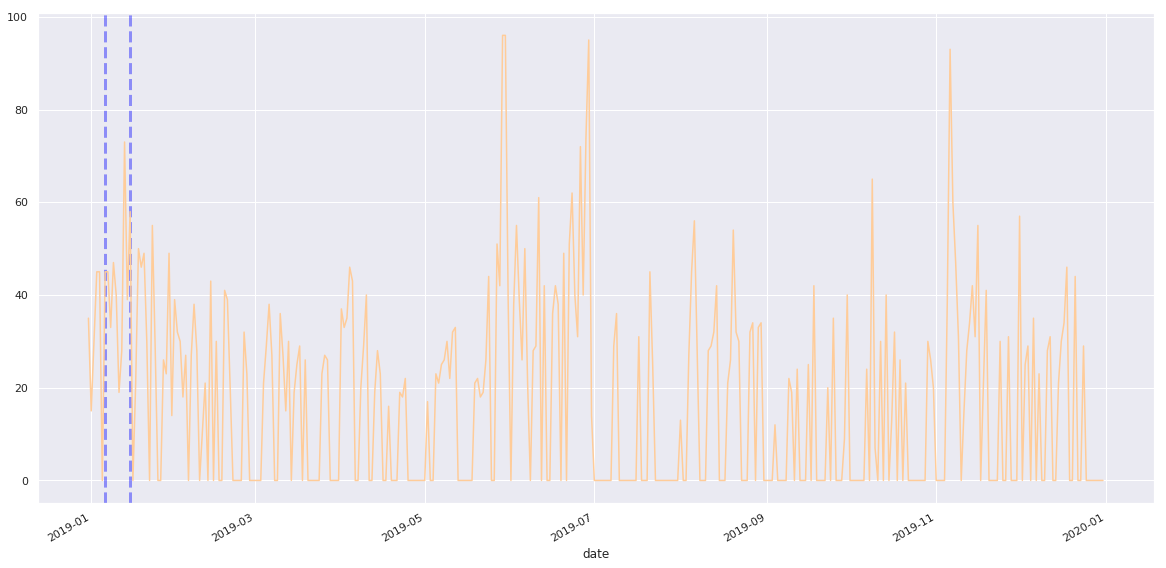

In [48]:
plt.axvline(lstart, color='blue', linestyle='dashed', linewidth=3, alpha=0.4)
plt.axvline(lend, color='blue', linestyle='dashed', linewidth=3, alpha=0.4)

colors = ['#ffcc99', '#99ff99', '#66b3ff']
df.set_index('date')['time_reading'].fillna(0).plot(figsize=(20, 10), colors=colors)

The longest reading streak was at the start of the year and last 10 days in which time I read about 7hrs and 146 pages

book
A Gentleman in Moscow                                     AxesSubplot(0.125,0.2;0.775x0.68)
Algorithms to Live By                                     AxesSubplot(0.125,0.2;0.775x0.68)
Batman and Ethics                                         AxesSubplot(0.125,0.2;0.775x0.68)
Fail                                                      AxesSubplot(0.125,0.2;0.775x0.68)
How I Killed Pluto and Why It Had It Coming               AxesSubplot(0.125,0.2;0.775x0.68)
How Not to Be Wrong The Power of Mathematical Thinking    AxesSubplot(0.125,0.2;0.775x0.68)
The Physics of God                                        AxesSubplot(0.125,0.2;0.775x0.68)
Where Do I Begin                                          AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

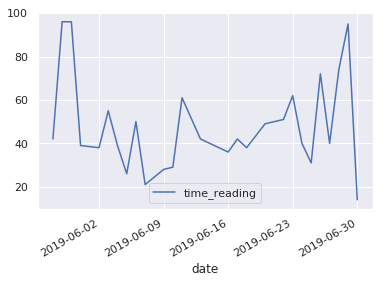

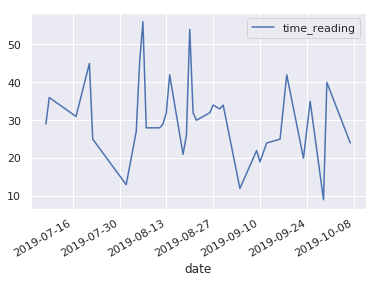

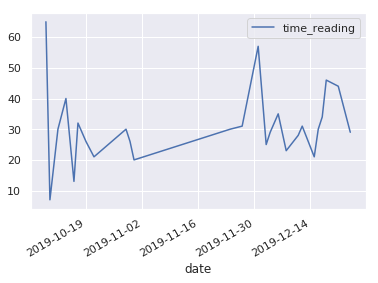

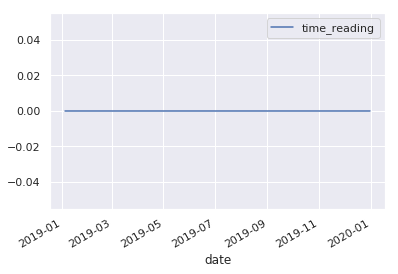

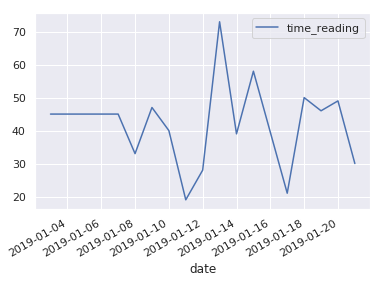

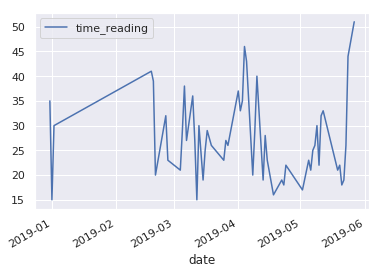

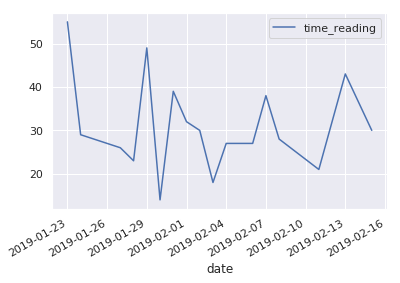

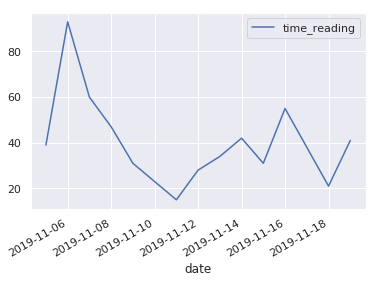

In [45]:
df.set_index('date').fillna(0).groupby('book').plot(y='time_reading', kind='line')

## Preferred time of day to read

In [ ]:
#plt.axvline(1, color='b', linestyle='yellow', linewidth=3)
book_df.sort_values('time_start', ascending=True).plot(x='time_start', y='time_reading', rot=90, figsize=(20, 10))